Get it done:
+ create a series of clusters and pick the one that best represents the data
    + need to dig deeper to see which one is most accurate...either by grouping presidents consistently or being able to find the sentences
    +  choose one clustering method (probably kmeans)
+ use the features to build models to classify texts by author
    + see if i can get a higher accuracy than 34%
+ on holdout group (remember to try with lsa), does clustering perform as you'd expect? is model performance consistent? 
    + (write this up)
+ how do clustering and modeling compare for classifying texts? what are the advantages of each? why would you want to use one over the other?
    + write this up
    + finish visualizations

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import sklearn
import spacy
import re
from nltk.corpus import gutenberg, stopwords
from collections import Counter

<h1><center>Load Data And Use Vectorizer to Generate Features</center></h1>

In [3]:
from nltk.corpus import inaugural

In [4]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [5]:
Obama = inaugural.sents("2009-Obama.txt")
Clinton = inaugural.sents("1993-Clinton.txt")
Clinton1 = inaugural.sents("1997-Clinton.txt")
Reagan = inaugural.sents("1981-Reagan.txt")
Nixon = inaugural.sents("1969-Nixon.txt")
Eisenhower = inaugural.sents("1957-Eisenhower.txt")
Eisenhower1 = inaugural.sents("1953-Eisenhower.txt")
McKinley = inaugural.sents("1897-McKinley.txt")
McKinley1 = inaugural.sents("1901-McKinley.txt")
Wilson = inaugural.sents("1917-Wilson.txt")
Wilson1 = inaugural.sents("1913-Wilson.txt")
Roosevelt = inaugural.sents("1933-Roosevelt.txt")
Roosevelt1 = inaugural.sents("1937-Roosevelt.txt")
Cleveland = inaugural.sents("1893-Cleveland.txt")
Cleveland1 = inaugural.sents("1885-Cleveland.txt")
Garfield = inaugural.sents("1881-Garfield.txt")

In [6]:
Obama[1]

['I',
 'stand',
 'here',
 'today',
 'humbled',
 'by',
 'the',
 'task',
 'before',
 'us',
 ',',
 'grateful',
 'for',
 'the',
 'trust',
 'you',
 'have',
 'bestowed',
 ',',
 'mindful',
 'of',
 'the',
 'sacrifices',
 'borne',
 'by',
 'our',
 'ancestors',
 '.']

In [7]:
Obama[-1]

['And', 'God', 'bless', 'the', 'United', 'States', 'of', 'America', '.']

In [8]:
Clinton[1]

['This',
 'ceremony',
 'is',
 'held',
 'in',
 'the',
 'depth',
 'of',
 'winter',
 ',',
 'but',
 'by',
 'the',
 'words',
 'we',
 'speak',
 'and',
 'the',
 'faces',
 'we',
 'show',
 'the',
 'world',
 ',',
 'we',
 'force',
 'the',
 'spring',
 '.']

In [9]:
inaugural_sents = []

for sentence in Obama:
    inaugural_sents.append(" ".join(sentence))

print("Number of Obama sentences", len(inaugural_sents))
    
for sentence in Clinton:
    inaugural_sents.append(" ".join(sentence))
    
for sentence in Clinton1:
    inaugural_sents.append(" ".join(sentence))
    
print("Number of sentences after Clinton:", len(inaugural_sents))

for sentence in Reagan:
    inaugural_sents.append(" ".join(sentence))
    
print("Number of sentences after Reagan:", len(inaugural_sents))

for sentence in Nixon:
    inaugural_sents.append(" ".join(sentence))
    
print("Number of sentences after Nixon:", len(inaugural_sents))

for sentence in Eisenhower:
    inaugural_sents.append(" ".join(sentence))
    
for sentence in Eisenhower1:
    inaugural_sents.append(" ".join(sentence))
    
print("Number of sentences after Eisenhower:", len(inaugural_sents))

for sentence in Garfield:
    inaugural_sents.append(" ".join(sentence))
    
print("Number of sentences after Garfield:", len(inaugural_sents))

for sentence in McKinley:
    inaugural_sents.append(" ".join(sentence))
    
for sentence in McKinley1:
    inaugural_sents.append(" ".join(sentence))
    
print("Number of sentences after McKinley:", len(inaugural_sents))

for sentence in Wilson:
    inaugural_sents.append(" ".join(sentence))
    
for sentence in Wilson1:
    inaugural_sents.append(" ".join(sentence))
    
print("Number of sentences after Wilson:", len(inaugural_sents))

for sentence in Roosevelt:
    inaugural_sents.append(" ".join(sentence))
    
for sentence in Roosevelt1:
    inaugural_sents.append(" ".join(sentence))
    
print("Number of sentences after Roosevelt:", len(inaugural_sents))

for sentence in Cleveland:
    inaugural_sents.append(" ".join(sentence))
    
for sentence in Cleveland1:
    inaugural_sents.append(" ".join(sentence))
    
print("Number of sentences after Cleveland:", len(inaugural_sents))

Number of Obama sentences 112
Number of sentences after Clinton: 305
Number of sentences after Reagan: 432
Number of sentences after Nixon: 538
Number of sentences after Eisenhower: 753
Number of sentences after Garfield: 865
Number of sentences after McKinley: 1095
Number of sentences after Wilson: 1223
Number of sentences after Roosevelt: 1404
Number of sentences after Cleveland: 1506


In [10]:
inaugural_sents[113]

'This ceremony is held in the depth of winter , but by the words we speak and the faces we show the world , we force the spring .'

In [265]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
vect_inaugural_sents=vectorizer.fit_transform(inaugural_sents)
print("Number of features: %d" % vect_inaugural_sents.get_shape()[1])

Number of features: 2053


In [266]:
vect_inaugural_sents_csr = vect_inaugural_sents.tocsr()

n = vect_inaugural_sents_csr.shape[0]

tfidf_bypara = [{} for _ in range(0,n)]

terms = vectorizer.get_feature_names()

for i, j in zip(*vect_inaugural_sents_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = vect_inaugural_sents_csr[i, j]

In [267]:
word_vectors = pd.DataFrame(tfidf_bypara)

word_vectors.head()

,000,1787,1890,1897,19th,20th,21st,abandon,abandoned,abandonment,...,written,wrong,wronged,year,years,yes,yield,young,youth,zeal
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [268]:
word_vectors.sum(axis=0)

000                1.279445
1787               0.831377
1890               0.561347
1897               0.772842
19th               0.828161
20th               0.905539
21st               1.412740
abandon            0.751256
abandoned          1.646255
abandonment        0.513629
abiding            1.649074
ability            2.511144
able               0.703075
abroad             1.430666
absence            0.776563
abundance          0.876721
accept             2.472588
accepted           0.831240
accomplished       1.972054
accomplishment     0.913701
account            1.417318
achieve            2.575203
achievement        2.488357
achievements       1.431531
acquiescence       0.595798
act                5.625846
action             7.335914
actions            0.692628
active             0.711026
activities         0.922531
                    ...    
winds              1.433305
winter             1.057247
wisdom             3.486752
wise               1.167973
wisely             2

In [269]:
word_vectors = word_vectors.fillna(0)

In [270]:
word_vectors.shape

(1506, 2053)

In [271]:
word_vectors.head()

,000,1787,1890,1897,19th,20th,21st,abandon,abandoned,abandonment,...,written,wrong,wronged,year,years,yes,yield,young,youth,zeal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [272]:
word_vectors["speech_sentence"] = inaugural_sents

In [273]:
word_vectors.head()

,000,1787,1890,1897,19th,20th,21st,abandon,abandoned,abandonment,...,wrong,wronged,year,years,yes,yield,young,youth,zeal,speech_sentence
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,My fellow citizens :
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,I stand here today humbled by the task before ...
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,I thank President Bush for his service to our ...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Forty - four Americans have now taken the pres...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The words have been spoken during rising tides...


In [274]:
speech_source = []
for i in range(0,len(Obama)):
    speech_source.append("Obama")
for i in range(0,len(Clinton)+len(Clinton1)):
    speech_source.append("Clinton")
for i in range(0,len(Reagan)):
    speech_source.append("Reagan")
for i in range(0,len(Nixon)):
    speech_source.append("Nixon")
for i in range(0,len(Garfield)):
    speech_source.append("Garfield")
for i in range(0,len(McKinley)+len(McKinley1)):
    speech_source.append("McKinley")
for i in range(0,len(Eisenhower)+len(Eisenhower1)):
    speech_source.append("Eisenhower")
for i in range(0,len(Wilson)+len(Wilson1)):
    speech_source.append("Wilson")   
for i in range(0,len(Roosevelt)+len(Roosevelt1)):
    speech_source.append("Roosevelt")    
for i in range(0,len(Cleveland)+len(Cleveland1)):
    speech_source.append("Cleveland")
    
print(len(speech_source))

1506


In [275]:
word_vectors["speech_source"] = speech_source

In [276]:
word_vectors.shape

(1506, 2055)

Text(0,0.5,'Number of Sentences')

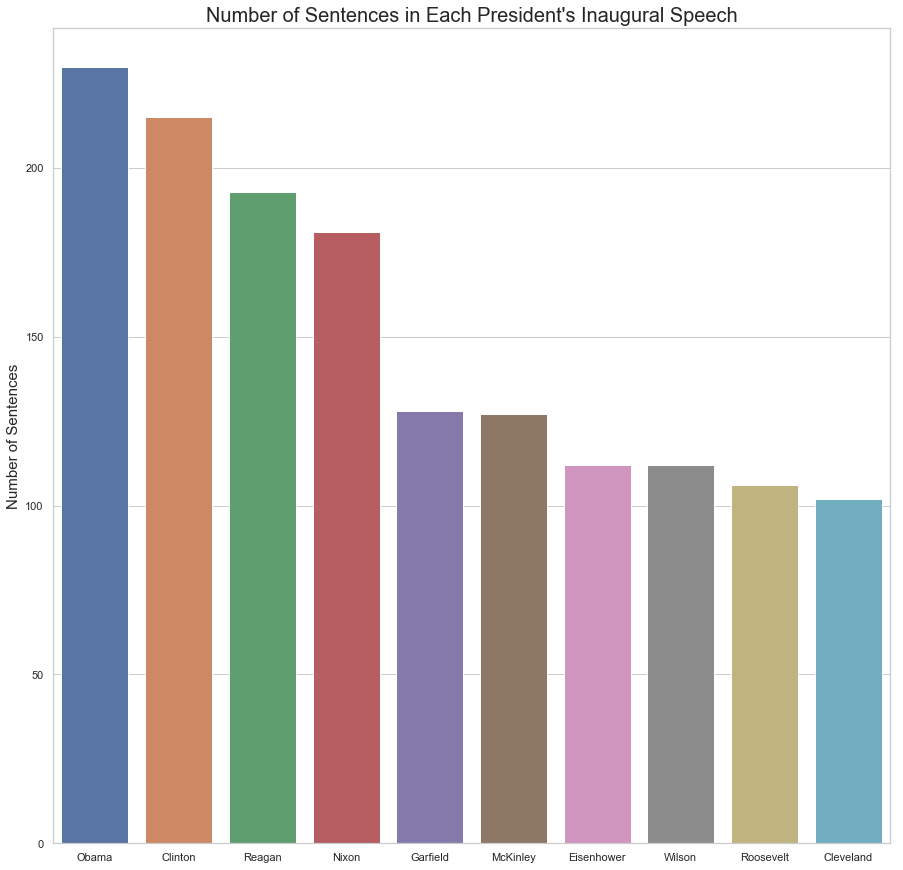

In [277]:
import seaborn as sns

sns.set(style="whitegrid")
ax = sns.barplot(x=word_vectors["speech_source"].unique(), y=word_vectors["speech_source"].value_counts(), data=word_vectors)

sns.set(rc={'figure.figsize':(15,15)})
ax.set_title("Number of Sentences in Each President's Inaugural Speech", size=20)
ax.set_ylabel("Number of Sentences", size=15)

In [278]:
Y = word_vectors["speech_source"]
X = np.array(word_vectors.loc[:, ~word_vectors.columns.isin(["speech_sentence", "speech_source"])])
print(X.shape)
print(Y.shape)

(1506, 2053)
(1506,)


In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

<h1><center>Create a Series of Clusters</center></h1>

### k-Means

In [168]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [169]:
kmeans = KMeans(n_clusters=10)
kmeans = kmeans.fit(X_train)
kmlabels = kmeans.predict(X_train)

In [170]:
from collections import Counter

Counter(kmlabels)

Counter({0: 568,
         7: 51,
         2: 106,
         1: 49,
         4: 22,
         9: 64,
         3: 102,
         8: 41,
         6: 83,
         5: 43})

In [171]:
534/1129

0.47298494242692646

### Meanshift

In [29]:
from sklearn.cluster import MeanShift, estimate_bandwidth

quantiles = [.1, .2, .3, .4, .5, .6, .65, .75, .9]

for q in quantiles:
    bandwidth = estimate_bandwidth(X_train, quantile=q, n_samples=100)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms = ms.fit(X_train)
    mslabels = ms.labels_
    print(q)
    print(len(ms.cluster_centers_))

0.1
1
0.2
1
0.3
1
0.4
1
0.5
1
0.6
1
0.65
1
0.75
1
0.9
1


In [30]:
ms = MeanShift()
ms = ms.fit(X_train)
mslabels = ms.labels_

In [31]:
Counter(mslabels)

Counter({0: 1129})

### Spectral Clustering

In [32]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=10)
sc = sc.fit(X_train)
sclabels = sc.labels_

In [33]:
Counter(sclabels)

Counter({8: 708, 3: 38, 6: 39, 1: 97, 5: 66, 0: 105, 9: 18, 2: 46, 7: 9, 4: 3})

### Digging into the different clustering methods

In [34]:
len(sclabels)

1129

In [35]:
len(y_train)

1129

In [36]:
cluster_labels_df = pd.DataFrame()

cluster_labels_df["speech_source"] = y_train
cluster_labels_df["km_clusters"] = kmlabels
cluster_labels_df["ms_clusters"] = mslabels
cluster_labels_df["sc_clusters"] = sclabels

In [37]:
Counter(cluster_labels_df[cluster_labels_df["speech_source"] == "Obama"]["km_clusters"]).most_common()

[(7, 28),
 (6, 15),
 (0, 9),
 (8, 8),
 (9, 7),
 (3, 4),
 (5, 3),
 (2, 2),
 (1, 1),
 (4, 1)]

In [38]:
Counter(cluster_labels_df[cluster_labels_df["speech_source"] == "Cleveland"]["km_clusters"]).most_common()

[(6, 27), (7, 21), (2, 19), (4, 4), (0, 4), (3, 2), (1, 2), (5, 1)]

In [39]:
Counter(cluster_labels_df[cluster_labels_df["speech_source"] == "Garfield"]["km_clusters"]).most_common()

[(6, 21),
 (7, 18),
 (3, 15),
 (5, 8),
 (0, 6),
 (1, 4),
 (9, 4),
 (2, 3),
 (4, 1),
 (8, 1)]

In [40]:
(Counter(cluster_labels_df[cluster_labels_df["km_clusters"] == 8]["speech_source"])).most_common()

[('Clinton', 20),
 ('Obama', 8),
 ('Roosevelt', 5),
 ('Wilson', 5),
 ('Eisenhower', 3),
 ('McKinley', 2),
 ('Reagan', 2),
 ('Nixon', 1),
 ('Garfield', 1)]

In [41]:
(Counter(cluster_labels_df[cluster_labels_df["km_clusters"] == 6]["speech_source"])).most_common()

[('McKinley', 43),
 ('Eisenhower', 38),
 ('Reagan', 31),
 ('Roosevelt', 27),
 ('Clinton', 27),
 ('Cleveland', 27),
 ('Wilson', 22),
 ('Nixon', 21),
 ('Garfield', 21),
 ('Obama', 15)]

In [42]:
(Counter(cluster_labels_df[cluster_labels_df["km_clusters"] == 5]["speech_source"])).most_common()

[('Wilson', 13),
 ('Eisenhower', 12),
 ('McKinley', 8),
 ('Garfield', 8),
 ('Roosevelt', 6),
 ('Clinton', 5),
 ('Obama', 3),
 ('Nixon', 3),
 ('Reagan', 2),
 ('Cleveland', 1)]

In [43]:
(Counter(cluster_labels_df[cluster_labels_df["km_clusters"] == 0]["speech_source"])).most_common()

[('McKinley', 16),
 ('Roosevelt', 15),
 ('Reagan', 10),
 ('Clinton', 10),
 ('Obama', 9),
 ('Garfield', 6),
 ('Eisenhower', 6),
 ('Wilson', 6),
 ('Cleveland', 4),
 ('Nixon', 4)]

In [44]:
(Counter(cluster_labels_df[cluster_labels_df["sc_clusters"] == 4]["speech_source"])).most_common()

[('McKinley', 1), ('Obama', 1), ('Garfield', 1)]

In [45]:
(Counter(cluster_labels_df[cluster_labels_df["sc_clusters"] == 9]["speech_source"])).most_common()

[('Clinton', 7),
 ('Roosevelt', 3),
 ('Reagan', 2),
 ('McKinley', 2),
 ('Obama', 2),
 ('Garfield', 1),
 ('Wilson', 1)]

In [46]:
(Counter(cluster_labels_df[cluster_labels_df["sc_clusters"] == 7]["speech_source"])).most_common()

[('Reagan', 6), ('Nixon', 2), ('Garfield', 1)]

### Running k-means and spectral clustering with 2 and 3 clusters 
#### Hypothesis: Might cluster by time period or political party

In [313]:
president_info = pd.DataFrame()
president_info["President"] = word_vectors["speech_source"].unique()
president_info["Political_Party"] = ["Democrat", "Democrat", "Republican", "Republican", "Republican", "Republican", "Republican",
                                    "Democrat", "Democrat", "Democrat"]
president_info["Term_Start"] = [2009, 1993, 1981, 1969, 1881, 1897, 1953, 1913, 1933, 1885]

president_info

,President,Political_Party,Term_Start
0,Obama,Democrat,2009
1,Clinton,Democrat,1993
2,Reagan,Republican,1981
3,Nixon,Republican,1969
4,Garfield,Republican,1881
5,McKinley,Republican,1897
6,Eisenhower,Republican,1953
7,Wilson,Democrat,1913
8,Roosevelt,Democrat,1933
9,Cleveland,Democrat,1885


In [ ]:
president_info.set_index("President", inplace=True)

In [321]:
president_info = president_info.sort_values("Term_Start")

colors = {"Republican": "red", "Democrat": "blue"}
president_info["Color"] = president_info["Political_Party"].map(colors)
president_info

,President,Political_Party,Term_Start,Color
4,Garfield,Republican,1881,red
9,Cleveland,Democrat,1885,blue
5,McKinley,Republican,1897,red
7,Wilson,Democrat,1913,blue
8,Roosevelt,Democrat,1933,blue
6,Eisenhower,Republican,1953,red
3,Nixon,Republican,1969,red
2,Reagan,Republican,1981,red
1,Clinton,Democrat,1993,blue
0,Obama,Democrat,2009,blue


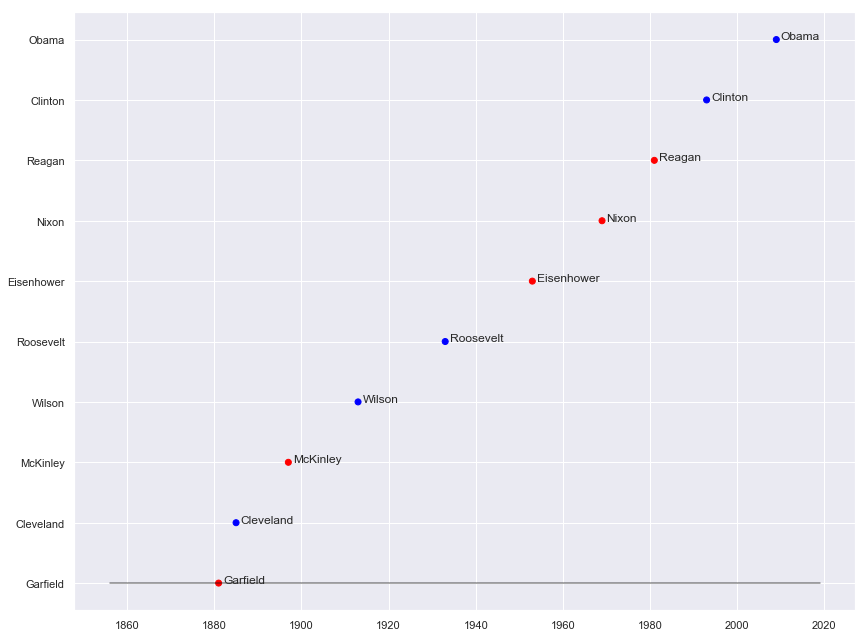

In [339]:
fig, ax = plt.subplots(figsize=(14, 11))

start = min(president_info["Term_Start"] - 25)
stop = max(president_info["Term_Start"] + 10)
ax.plot((start, stop), (0, 0), 'k', alpha=.5)

ax.scatter(x=president_info["Term_Start"], y=president_info["President"], c=president_info["Color"])

for president in president_info["President"]:
    ax.annotate(president, xy=(president_info[president_info["President"] == president]["Term_Start"], president), 
                xytext=(president_info[president_info["President"] == president]["Term_Start"] + 1, president))

plt.show()

In [47]:
kmeans3 = KMeans(n_clusters=3)
kmeans3 = kmeans3.fit(X_train)
km3labels = kmeans3.predict(X_train)

In [48]:
Counter(km3labels)

Counter({0: 860, 2: 79, 1: 190})

In [49]:
kmeans2 = KMeans(n_clusters=2)
kmeans2 = kmeans2.fit(X_train)
km2labels = kmeans2.predict(X_train)

In [50]:
Counter(km2labels)

Counter({0: 896, 1: 233})

In [51]:
len(km2labels)

1129

In [52]:
sc3 = SpectralClustering(n_clusters=3)
sc3 = sc3.fit(X_train)
sc3labels = sc3.labels_

Counter(sc3labels)

Counter({0: 933, 1: 186, 2: 10})

In [53]:
sc2 = SpectralClustering(n_clusters=2)
sc2 = sc2.fit(X_train)
sc2labels = sc2.labels_

Counter(sc2labels)

Counter({1: 1117, 0: 12})

In [54]:
cluster_labels_df["km2_clusters"] = km2labels
cluster_labels_df["km3_clusters"] = km3labels


In [55]:
cluster_labels_df.head()

,speech_source,km_clusters,ms_clusters,sc_clusters,km2_clusters,km3_clusters
1397,Roosevelt,6,0,8,0,0
711,McKinley,7,0,8,0,0
247,Clinton,6,0,8,0,0
667,McKinley,6,0,8,0,0
1199,Wilson,6,0,8,0,0


### Digging into the different clustering methods (after running with 2 and 3 clusters)

In [56]:
(Counter(cluster_labels_df[cluster_labels_df["km2_clusters"] == 1]["speech_source"])).most_common()

[('Eisenhower', 53),
 ('Cleveland', 41),
 ('McKinley', 40),
 ('Roosevelt', 23),
 ('Clinton', 22),
 ('Reagan', 16),
 ('Nixon', 12),
 ('Wilson', 12),
 ('Garfield', 8),
 ('Obama', 6)]

In [57]:
(Counter(cluster_labels_df[cluster_labels_df["km2_clusters"] == 0]["speech_source"])).most_common()

[('McKinley', 131),
 ('Clinton', 127),
 ('Roosevelt', 114),
 ('Eisenhower', 112),
 ('Reagan', 84),
 ('Wilson', 80),
 ('Garfield', 73),
 ('Obama', 72),
 ('Nixon', 64),
 ('Cleveland', 39)]

In [58]:
(Counter(cluster_labels_df[cluster_labels_df["km3_clusters"] == 1]["speech_source"])).most_common()

#Clinton is chronological outlier here

[('Eisenhower', 47),
 ('McKinley', 36),
 ('Cleveland', 34),
 ('Roosevelt', 19),
 ('Reagan', 15),
 ('Clinton', 14),
 ('Wilson', 10),
 ('Nixon', 7),
 ('Garfield', 4),
 ('Obama', 4)]

<h1><center>Feature Engineering</center></h1>

In [94]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

svd = TruncatedSVD(350)
lsa = make_pipeline(svd, Normalizer(copy=False))

X_train_lsa = lsa.fit_transform(X_train)

variance_explained = svd.explained_variance_ratio_
total_variance = variance_explained.sum()

print("Percent variance captured by all components", total_variance*100)

Percent variance captured by all components 67.00289888876132


In [95]:
type(X_train_lsa)

numpy.ndarray

In [61]:
sentences_by_component = pd.DataFrame(X_train_lsa, index=X_train)


In [62]:
type(X_train)

numpy.ndarray

In [63]:
print(X_train.shape)
print(X_train_lsa.shape)

(1129, 2053)
(1129, 500)


<h1><center>Build Models to Classify Texts By Author</center></h1>

### Multi-layer Perceptron

In [280]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(1000,))


In [281]:
mlp = mlp.fit(X_train, y_train)

In [282]:
print("MLP Training score: ", mlp.score(X_train, y_train))

MLP Training score:  0.9875996457041629


In [283]:
mlp_pred = mlp.predict(X_test)

pd.crosstab(y_test, mlp_pred)

col_0,Cleveland,Clinton,Eisenhower,Garfield,McKinley,Nixon,Obama,Reagan,Roosevelt,Wilson
speech_source,,,,,,,,,,
Cleveland,6,1,7,1,7,0,0,0,0,0
Clinton,0,15,0,2,4,0,10,7,2,4
Eisenhower,7,3,23,1,9,0,4,0,2,1
Garfield,5,5,4,6,2,2,3,0,1,3
McKinley,6,5,12,3,21,4,2,3,2,1
Nixon,0,6,1,2,3,7,2,2,6,1
Obama,2,10,0,1,6,2,6,2,2,3
Reagan,2,6,3,1,2,3,3,4,3,0
Roosevelt,2,3,7,2,5,1,7,1,14,2


In [284]:
print("MLP Test Score: ", mlp.score(X_test, y_test))

MLP Test Score:  0.29442970822281167


### k-Nearest Neighbors Classifier


In [147]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier(weights="distance")
neighbors.fit(X_train, y_train)
y_pred_train = neighbors.predict(X_train)
print("KNN Training Score: ", (y_pred_train == y_train).sum() / y_train.shape[0])

KNN Training Score:  0.9875996457041629


In [148]:
knn_pred = mlp.predict(X_test)

pd.crosstab(y_test, knn_pred)

col_0,Cleveland,Clinton,Eisenhower,Garfield,McKinley,Nixon,Obama,Reagan,Roosevelt,Wilson
speech_source,,,,,,,,,,
Cleveland,5,1,8,0,7,0,0,0,1,0
Clinton,0,15,0,2,4,0,10,7,2,4
Eisenhower,7,3,24,1,8,0,4,0,2,1
Garfield,4,3,5,6,3,2,4,1,1,2
McKinley,7,3,12,2,20,5,3,3,2,2
Nixon,0,6,1,2,3,7,2,2,6,1
Obama,2,9,0,1,6,2,7,2,3,2
Reagan,1,7,4,1,2,3,3,3,3,0
Roosevelt,2,3,6,2,4,1,7,1,16,2


In [149]:
print("KNN Test Score: ", neighbors.score(X_test, y_test))

KNN Test Score:  0.10079575596816977


### Logistic Regression

In [285]:
from sklearn.linear_model import LogisticRegression

logist = LogisticRegression(fit_intercept=False, C=1)
logist.fit(X_train, y_train)

print("Logistic Regression Training Score: ", logist.score(X_train, y_train))

Logistic Regression Training Score:  0.9193976970770593


In [286]:
logist_pred = logist.predict(X_test)

pd.crosstab(y_test, logist_pred)

col_0,Cleveland,Clinton,Eisenhower,Garfield,McKinley,Nixon,Obama,Reagan,Roosevelt,Wilson
speech_source,,,,,,,,,,
Cleveland,6,2,6,0,8,0,0,0,0,0
Clinton,1,25,0,1,6,2,2,2,1,4
Eisenhower,3,3,27,1,8,0,0,0,5,3
Garfield,2,4,3,4,7,3,2,2,2,2
McKinley,3,6,13,2,27,1,2,3,2,0
Nixon,0,11,2,1,3,5,0,2,6,0
Obama,3,14,0,0,6,4,2,0,3,2
Reagan,2,7,4,2,2,3,0,3,4,0
Roosevelt,0,2,7,2,6,0,7,2,16,2


In [287]:
print("Logistic Regression Test Score: ", logist.score(X_test, y_test))

Logistic Regression Test Score:  0.3395225464190981


### Lasso Regression

In [75]:
lambdas = [.02, .05, .10, .15, .25, .35, .5, .55, .65, .75, .95, 1, 1.1]


for lam in lambdas:
    lass = LogisticRegression(C=1/lam, fit_intercept=False, penalty="l1")
    lass.fit(X_train, y_train)
    print(lam, lass.score(X_train, y_train))

0.02 0.9840566873339238
0.05 0.9840566873339238
0.1 0.9822852081488043
0.15 0.9769707705934455
0.25 0.9503985828166519
0.35 0.8565101860053145
0.5 0.6882196634189548
0.55 0.6403897254207263
0.65 0.566873339238264
0.75 0.4995571302037201
0.95 0.41895482728077943
1 0.4003542958370239
1.1 0.37643932683790965


In [76]:
lass = LogisticRegression(fit_intercept=False, penalty="l1", C=1/.05)
lass.fit(X_train, y_train)

print("Lasso Regression Training Score: ", lass.score(X_train, y_train))

Lasso Regression Training Score:  0.9840566873339238


In [77]:
lass_pred = lass.predict(X_test)

pd.crosstab(y_test, lass_pred)

col_0,Cleveland,Clinton,Eisenhower,Garfield,McKinley,Nixon,Obama,Reagan,Roosevelt,Wilson
speech_source,,,,,,,,,,
Cleveland,5,2,4,1,5,1,1,0,2,1
Clinton,1,13,0,2,5,3,9,6,1,4
Eisenhower,8,2,19,1,10,1,0,1,6,2
Garfield,1,6,2,2,6,5,3,3,1,2
McKinley,7,4,11,2,20,7,3,2,2,1
Nixon,2,7,2,2,3,8,1,0,3,2
Obama,4,8,0,3,3,5,3,2,4,2
Reagan,1,6,3,2,3,4,1,6,1,0
Roosevelt,0,1,3,3,7,1,3,5,15,6


In [91]:
print("Lasso Regression Test Score: ", lass.score(X_test, y_test))

Lasso Regression Test Score:  0.27586206896551724


### Random Forest

In [81]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

rfc.fit(X_train, y_train)
print("Random Forest Training Score: ", rfc.score(X_train, y_train))

Random Forest Training Score:  0.9813994685562445


In [82]:
rfc_pred = rfc.predict(X_test)

pd.crosstab(y_test, rfc_pred)

col_0,Cleveland,Clinton,Eisenhower,Garfield,McKinley,Nixon,Obama,Reagan,Roosevelt,Wilson
speech_source,,,,,,,,,,
Cleveland,4,2,8,0,4,0,0,0,3,1
Clinton,2,16,1,1,7,3,4,5,2,3
Eisenhower,3,2,23,1,13,0,0,1,5,2
Garfield,3,8,7,4,4,0,0,2,2,1
McKinley,3,6,17,5,12,3,3,4,3,3
Nixon,0,10,1,1,2,3,4,0,5,4
Obama,1,11,8,1,2,3,3,1,2,2
Reagan,3,7,6,2,2,2,0,3,2,0
Roosevelt,1,6,7,3,5,0,5,3,11,3


In [83]:
print("Random Forest Test Score: ", rfc.score(X_test, y_test))

Random Forest Test Score:  0.22546419098143236


### Improving Accuracy of Logistic/Ridge Regression Model

In [96]:
svd = TruncatedSVD(350)
lsa = make_pipeline(svd, Normalizer(copy=False))

X_test_lsa = lsa.fit_transform(X_test)

In [97]:
X_test_lsa.shape

(377, 350)

In [100]:
logist_lsa = LogisticRegression(fit_intercept=False, C=1)
logist_lsa.fit(X_train_lsa, y_train)

print("LSA Logistic Regression Training Score: ", logist_lsa.score(X_train_lsa, y_train))

LSA Logistic Regression Training Score:  0.7590788308237378


In [101]:
logist_lsa_pred = logist_lsa.predict(X_test_lsa)

pd.crosstab(y_test, logist_lsa_pred)

col_0,Cleveland,Clinton,Eisenhower,Garfield,McKinley,Nixon,Obama,Reagan,Roosevelt,Wilson
speech_source,,,,,,,,,,
Cleveland,1,4,7,0,5,0,0,1,3,1
Clinton,8,11,7,1,10,0,0,0,5,2
Eisenhower,3,8,9,3,10,1,3,3,5,5
Garfield,1,6,6,1,7,3,0,3,2,2
McKinley,2,14,9,2,18,4,0,5,3,2
Nixon,1,6,7,2,3,0,1,0,9,1
Obama,2,8,5,0,4,2,2,3,7,1
Reagan,0,4,6,3,5,0,0,1,7,1
Roosevelt,2,19,1,2,5,3,2,2,4,4


In [104]:
print("LSA Logistic Regression Test Score: ", logist_lsa.score(X_test_lsa, y_test))

LSA Logistic Regression Test Score:  0.13527851458885942


In [116]:
regularization = [.25, .5, .6, .7, .75, .8, 1, 1.25, .15]

for r in regularization:
    logist = LogisticRegression(fit_intercept=False, C=1/r)
    logist = logist.fit(X_train, y_train)
    print(r, "\nLogistic Regression Training Score: ", logist.score(X_train, y_train))
    print("Logistic Regression Test Score: ", logist.score(X_test, y_test))
    

0.25 
Logistic Regression Training Score:  0.9636846767050488
Logistic Regression Test Score:  0.3421750663129973
0.5 
Logistic Regression Training Score:  0.9450841452612931
Logistic Regression Test Score:  0.3421750663129973
0.6 
Logistic Regression Training Score:  0.9344552701505757
Logistic Regression Test Score:  0.3421750663129973
0.7 
Logistic Regression Training Score:  0.9309123117803366
Logistic Regression Test Score:  0.3448275862068966
0.75 
Logistic Regression Training Score:  0.9282550930026572
Logistic Regression Test Score:  0.3448275862068966
0.8 
Logistic Regression Training Score:  0.9255978742249779
Logistic Regression Test Score:  0.3448275862068966
1 
Logistic Regression Training Score:  0.9193976970770593
Logistic Regression Test Score:  0.3395225464190981
1.25 
Logistic Regression Training Score:  0.912311780336581
Logistic Regression Test Score:  0.3421750663129973
0.15 
Logistic Regression Training Score:  0.9698848538529672
Logistic Regression Test Score:  0

In [120]:
tolerance = [.000001, .00001, .0001, .0005, .001, .01, .5, .75, 1]

for t in tolerance:
    logist = LogisticRegression(fit_intercept=False, C=1/.75, tol=t)
    logist = logist.fit(X_train, y_train)
    print(t, "\nLogistic Regression Training Score: ", logist.score(X_train, y_train))
    print("Logistic Regression Test Score: ", logist.score(X_test, y_test))

1e-06 
Logistic Regression Training Score:  0.9282550930026572
Logistic Regression Test Score:  0.3448275862068966
1e-05 
Logistic Regression Training Score:  0.9282550930026572
Logistic Regression Test Score:  0.3448275862068966
0.0001 
Logistic Regression Training Score:  0.9282550930026572
Logistic Regression Test Score:  0.3448275862068966
0.0005 
Logistic Regression Training Score:  0.9282550930026572
Logistic Regression Test Score:  0.3448275862068966
0.001 
Logistic Regression Training Score:  0.9282550930026572
Logistic Regression Test Score:  0.3448275862068966
0.01 
Logistic Regression Training Score:  0.9282550930026572
Logistic Regression Test Score:  0.3448275862068966
0.5 
Logistic Regression Training Score:  0.9247121346324181
Logistic Regression Test Score:  0.34748010610079577
0.75 
Logistic Regression Training Score:  0.9247121346324181
Logistic Regression Test Score:  0.34748010610079577
1 
Logistic Regression Training Score:  0.9158547387068202
Logistic Regression T

In [121]:
logist = LogisticRegression(fit_intercept=False, C=1/.75, tol=.5)
logist.fit(X_train, y_train)

print("Logistic Regression Training Score: ", logist.score(X_train, y_train))

Logistic Regression Training Score:  0.9247121346324181


In [122]:
logist_pred = logist.predict(X_test)

pd.crosstab(y_test, logist_pred)

col_0,Cleveland,Clinton,Eisenhower,Garfield,McKinley,Nixon,Obama,Reagan,Roosevelt,Wilson
speech_source,,,,,,,,,,
Cleveland,7,2,5,0,8,0,0,0,0,0
Clinton,1,24,0,1,4,3,3,3,1,4
Eisenhower,5,3,25,1,8,0,0,0,5,3
Garfield,3,3,3,5,6,3,2,2,2,2
McKinley,3,6,13,2,27,1,2,3,2,0
Nixon,0,10,2,1,3,6,0,2,6,0
Obama,3,12,0,0,6,4,2,0,3,4
Reagan,2,7,4,2,2,3,0,3,4,0
Roosevelt,0,2,6,3,5,0,7,2,17,2


In [123]:
print("Logistic Regression Test Score: ", logist.score(X_test, y_test))

Logistic Regression Test Score:  0.34748010610079577
